**PreProcessing**

Here we have performed some preprocessing, we took the bgl2 file we displayed some lines in it and also the total number of lines in the file. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


The Google Drive is mounted to your Colab session using this code block. You may use Colab to instantly store files to your Google Drive and access them from there.

You will be requested to provide Colab access to your Google Drive when you run this code block. You will receive a URL when you provide permission that you must copy and paste into the input form in the output section. When you're finished, your Google Drive will be mounted and accessible via the file browser in the Colab notebook's left-hand corner.



In [ ]:
# File paths
input_file_path = "/content/drive/MyDrive/NLP Project dataset/bgl2"  #input file path

# Open file
with open(input_file_path, 'r') as file:
    lines = file.readlines()  # Read all lines into a list

# Get the number of lines in the file
num_lines = len(lines)
# reading first 3 lines
with open(input_file_path, 'r') as file:
    line = file.readline()  # Read all lines into a list
    for i in range(3):
      print(line)
# Print the number of lines
print("Number of lines in the file:", num_lines)


- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected

- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected

- 1117838570 2005.06.03 R02-M1-N0-C:J12-U11 2005-06-03-15.42.50.363779 R02-M1-N0-C:J12-U11 RAS KERNEL INFO instruction cache parity error corrected

Number of lines in the file: 4747963


Here we have changed the first 6 spaces into pipes, so that we can load that data into dataframe easily.

In [ ]:
# Read lines from input file
with open(input_file_path, 'r') as input_file:
    lines = input_file.readlines()[:1138779]  # Read first 10 lines
    input_file.close()

# Modify lines by replacing first 6 spaces with pipes
modified_lines = []
for line in lines:
    modified_line = line.replace(' ', '|',6)
    modified_lines.append(modified_line)
output_file_path = "output.txt"  #output file path
# Write modified lines to output file
with open(output_file_path, 'w') as output_file:
    output_file.writelines(modified_lines)
    output_file.close()

In [ ]:
# Write modified lines to output file
with open(output_file_path, 'r') as output_file:
    for i in range(10):
      line = output_file.readline()
      print(line) 

-|1117838570|2005.06.03|R02-M1-N0-C:J12-U11|2005-06-03-15.42.50.363779|R02-M1-N0-C:J12-U11|RAS KERNEL INFO instruction cache parity error corrected

-|1117838570|2005.06.03|R02-M1-N0-C:J12-U11|2005-06-03-15.42.50.527847|R02-M1-N0-C:J12-U11|RAS KERNEL INFO instruction cache parity error corrected

-|1117838570|2005.06.03|R02-M1-N0-C:J12-U11|2005-06-03-15.42.50.675872|R02-M1-N0-C:J12-U11|RAS KERNEL INFO instruction cache parity error corrected

-|1117838570|2005.06.03|R02-M1-N0-C:J12-U11|2005-06-03-15.42.50.823719|R02-M1-N0-C:J12-U11|RAS KERNEL INFO instruction cache parity error corrected

-|1117838570|2005.06.03|R02-M1-N0-C:J12-U11|2005-06-03-15.42.50.982731|R02-M1-N0-C:J12-U11|RAS KERNEL INFO instruction cache parity error corrected

-|1117838571|2005.06.03|R02-M1-N0-C:J12-U11|2005-06-03-15.42.51.131467|R02-M1-N0-C:J12-U11|RAS KERNEL INFO instruction cache parity error corrected

-|1117838571|2005.06.03|R02-M1-N0-C:J12-U11|2005-06-03-15.42.51.293532|R02-M1-N0-C:J12-U11|RAS KERNEL INFO

**Creating a dataframe**
Below we have created a dataframe from the output file we have selected.

In [ ]:
import pandas as pd

df = pd.read_csv("output.txt",sep='|', header=None,names=['log_source','log_number','date','level1','dateandtime','level2','log_entry'])

In [ ]:
df.head()

,log_source,log_number,date,level1,dateandtime,level2,log_entry
0,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.363779,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.527847,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.675872,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.823719,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03-15.42.50.982731,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...


In [ ]:
len(df)

1138779

In [ ]:
search_for = ['ALERT','ERR','WARN']
df1 = df[df.log_entry.str.contains('|'.join(search_for))==True]
df1.head()

,log_source,log_number,date,level1,dateandtime,level2,log_entry
191407,-,1118241709,2005.06.08,R33-M1-ND,2005-06-08-07.41.49.839299,R33-M1-ND,NULL HARDWARE WARNING PrepareForService is bei...
191408,-,1118241718,2005.06.08,R33-M1-ND,2005-06-08-07.41.58.284197,R33-M1-ND,NULL HARDWARE WARNING PrepareForService shutti...
191410,-,1118245845,2005.06.08,UNKNOWN_LOCATION,2005-06-08-08.50.45.053194,UNKNOWN_LOCATION,NULL HARDWARE WARNING EndServiceAction is rest...
191411,-,1118245845,2005.06.08,UNKNOWN_LOCATION,2005-06-08-08.50.45.058394,UNKNOWN_LOCATION,NULL HARDWARE WARNING EndServiceAction 219 per...
191412,-,1118245894,2005.06.08,R33-M1-N6,2005-06-08-08.51.34.454332,R33-M1-N6,NULL DISCOVERY WARNING Node card is not fully ...


In [ ]:
print("The length of possible lines with words containg Alert, ERR, Warn is :",len(df1))

The length of possible lines with words containg Alert, ERR, Warn is : 4972


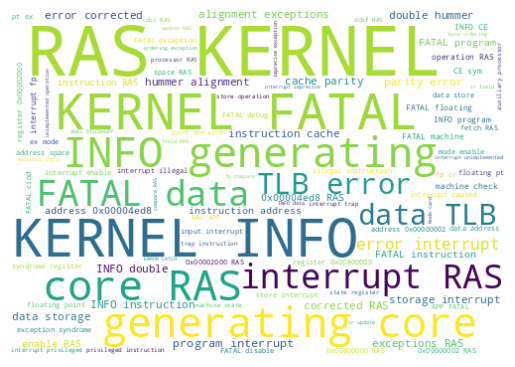

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Create stopword list
stopwords = set(STOPWORDS)

def plot_world_cloud (text):# Create and generate a word cloud image:
    wordcloud = WordCloud(width=500, height=350, stopwords=stopwords, max_words=100, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# get all log entries
text = " ".join(entry for entry in df.log_entry)
plot_world_cloud(text)

In [ ]:
search_for = ['KERNEL','INFO']
df2 = df[df.log_entry.str.contains('|'.join(search_for))==False]

From the data we can see that kernel and info are the most common words used in our log entries. Below we tried to see how many lines does not contain those words as they can be possible anomalies. 
we got 19623 lines which might be possible anomalies against total number of lines 1138779. But we can infer one thing from this, which is the dataset is largely imbalanced.

In [ ]:
print("Number of lines not containg Kernel and Info(possible anomalies) :",len(df1))
print("Total Number of lines :",len(df))

Number of lines not containg Kernel and Info(possible anomalies) : 4972
Total Number of lines : 1138779


In [ ]:
# Change the data type of column 'A' to string
df['level1'] = df['level1'].astype(str)

# Print the updated data types of the columns
print(df.dtypes)

log_source     object
log_number      int64
date           object
level1         object
dateandtime    object
level2         object
log_entry      object
dtype: object


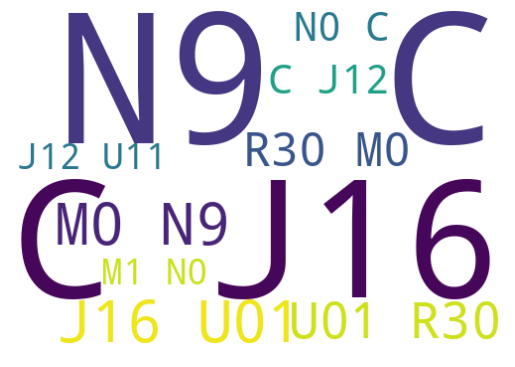

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# Create stopword list
stopwords = set(STOPWORDS)

def plot_world_cloud (text):# Create and generate a word cloud image:
    wordcloud = WordCloud(width=500, height=350, stopwords=stopwords, max_words=10, background_color="white").generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# get all log entries
text = " ".join(level1 for level1 in df.level1)
plot_world_cloud(text)

Wordcloud is an python library used to generate the word cloud image from a given text.  Stop words are used to remove the english language words. plot_word_cloud is a function takes the text parameter and creates a cloud image with  width 500 pixels, height 350 pixels, maximum words only 10 can be generated as we mention max_words 10 in the above code and added the white background color to generate the text(output). Dataframe df generates the common words in level 11. Hopefully and finally generated the word cloud image as an output.

In [ ]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
english_stopwords = stopwords.words('english')
def get_top_n_trigram(corpus, n=None):
    vec = TfidfVectorizer(ngram_range=(3, 3), stop_words=english_stopwords, smooth_idf=False).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:20]
common_words = get_top_n_trigram(df['log_entry'], 20)
for word, freq in common_words:
    print("{0:35}{1:}".format(word,freq))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


ras kernel fatal                   117423.1014498484
kernel fatal data                  98155.42853753311
ras kernel info                    78625.40254027644
fatal data tlb                     75935.4544566271
data tlb error                     75935.4544566271
tlb error interrupt                75935.4544566271
kernel info generating             61126.54520074478
info generating core               61126.54520074478
data storage interrupt             39189.99035502865
fatal data storage                 39189.82359739589
kernel info instruction            29468.18991361574
kernel fatal instruction           29103.17509904902
fatal instruction address          29101.326228790058
cache parity error                 28590.698064421747
info instruction cache             28588.482073965395
instruction cache parity           28588.482073965395
parity error corrected             28588.482073965395
instruction address 0x00004ed8     26941.960924278344
kernel fatal program               21116.40

This code is written to extract the top 20 trigrams from the given corpus. sklearn.feature_extraction feature is used to extract the features from the given corpus data and Stop words are used to remove the english language words.
get_top_n_trigram is the function to extract the data in the corpus in such a way that it takes top 20 trigrams eliminates the remaining data in the corpus. Here we have use bagofwords, sumofwords and words frequency 20 to be printed. Finally top 20 trigrams will be printed and their corresponding frequencies will be printed in the form string of top 20 trigrams out of 35 in the unformatted field.


In [ ]:
import pandas as pd
import plotly.express as px
from plotly.offline import iplot

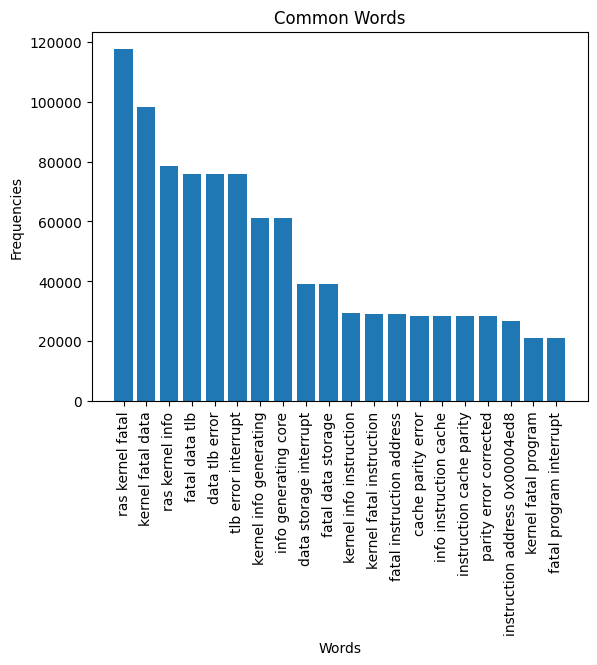

In [ ]:
import matplotlib.pyplot as plt

# Extracting words and frequencies from the common_words data
words = [word for word, freq in common_words]
frequencies = [freq for word, freq in common_words]

# Creating a bar graph
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Common Words')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


As shown in the above bar graph, this bar graph is generated using (matplotlib.pyplot) is the library to visualize the top 20 trigrams and their frequencies generated in the given previous code. firstly it will extracts the trigram words and frequencies generated by the earlier code. Here we have setted the x and y labels used to represent the x axis and y axis and represents the title.
And finally it generates the graph as shown in the above figure.



In [ ]:
# Load data into DataFrame, assuming date column is named 'date_column'
df['dateandtime'] = pd.to_datetime(df['dateandtime'],format='%Y-%m-%d-%H.%M.%S.%f')  # Convert to datetime data type
print(df.dateandtime)

0         2005-06-03 15:42:50.363779
1         2005-06-03 15:42:50.527847
2         2005-06-03 15:42:50.675872
3         2005-06-03 15:42:50.823719
4         2005-06-03 15:42:50.982731
                     ...            
1138774   2005-06-29 18:15:30.018647
1138775   2005-06-29 18:15:30.056060
1138776   2005-06-29 18:15:30.091257
1138777   2005-06-29 18:15:30.126467
1138778   2005-06-29 18:15:30.161580
Name: dateandtime, Length: 1138779, dtype: datetime64[ns]


In [ ]:
df.head()

,log_source,log_number,date,level1,dateandtime,level2,log_entry
0,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.363779,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
1,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.527847,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
2,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.675872,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
3,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.823719,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...
4,-,1117838570,2005.06.03,R02-M1-N0-C:J12-U11,2005-06-03 15:42:50.982731,R02-M1-N0-C:J12-U11,RAS KERNEL INFO instruction cache parity error...


Df is an dataframe and head() is the method used to generate the first n rows of the datframe.

In [ ]:
df1=df.groupby('date').count()

As shown in the above code df1 is the DataFrame which haves the unique data value in the date column and applies the count() function to each group.



In [ ]:
dates=[]
dates=df1.index 
counts=[]
for date in dates:
  counts.append(df1.loc[date].log_source)

Df is the daatframe assigns the date formate here. It will initialize the empty dates and each date will be extracted some value using log source and refers to the count list to count the dates list.

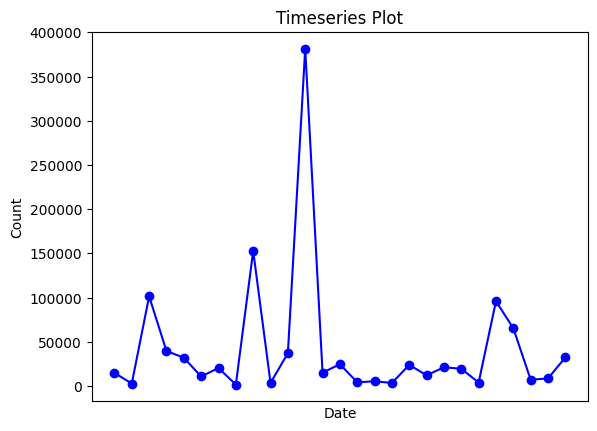

<Figure size 2500x500 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import datetime

# Convert the date strings to datetime objects
dates = [datetime.datetime.strptime(date, '%Y.%m.%d') for date in dates]

# Create a timeseries plot
plt.plot(dates, counts, marker='o', linestyle='-', color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Timeseries Plot')
plt.xticks([])#to hide the dates so that grapgh wont look clumsy
plt.figure(figsize=(25, 5))

# Display the plot
plt.show()


In this code, it will convert the date strings to the date time objects 

In [ ]:
df[df.date=="2005.06.14"].head()

,log_source,log_number,date,level1,dateandtime,level2,log_entry
415804,-,1118732555,2005.06.14,R36-M0-N0-C:J10-U11,2005-06-14 00:02:35.345236,R36-M0-N0-C:J10-U11,RAS KERNEL INFO generating core.1965
415805,-,1118732555,2005.06.14,R36-M0-N0-C:J16-U01,2005-06-14 00:02:35.452045,R36-M0-N0-C:J16-U01,RAS KERNEL INFO generating core.1700
415806,-,1118732555,2005.06.14,R36-M0-N0-C:J12-U01,2005-06-14 00:02:35.474887,R36-M0-N0-C:J12-U01,RAS KERNEL INFO generating core.1701
415807,-,1118732555,2005.06.14,R36-M0-N4-C:J14-U11,2005-06-14 00:02:35.498195,R36-M0-N4-C:J14-U11,RAS KERNEL INFO generating core.940
415808,-,1118732555,2005.06.14,R36-M0-N4-C:J10-U11,2005-06-14 00:02:35.521001,R36-M0-N4-C:J10-U11,RAS KERNEL INFO generating core.941


In this code df refers to dataframe where it filters the above date and genarated only first few rows for data representation as shown in the output


In [ ]:
!pip install loglizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Here loglizer is the python package provides the various functionalities.

In [ ]:
import sys
sys.path.append('../')

import argparse
import numpy as np
import pandas as pd
import random
from importlib import reload  
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.utils import shuffle
import loglizer
from loglizer.models import InvariantsMiner, PCA, IsolationForest, LogClustering, LR, SVM
from loglizer import dataloader, preprocessing
from loglizer.utils import metrics
log_file = "/content/drive/MyDrive/NLP Project dataset/bgl2"

In [38]:
ouput_dir = "/content/output/bgl/"
middle_dir = ""
log_file = "BGL.log"

In [ ]:
# Use dir() to get a list of attributes in the Logilizer module
attributes = dir(loglizer.dataloader)

# Print the list of attributes
print(attributes)


dir() is a funcytion used to get the list of attributes and get to know the availability of methods in datalo module of the loglizer package. Here we need to print the attributes. The final output will generate a list  of attributes and  available methods in the dataloader module.

In [39]:
(x_train, y_train), (x_test, y_test) = dataloader.load_data(ouput_dir, middle_dir, log_file, is_mapping=True)

Train normal size: 358
Train abnormal size: 179
Total logkey(exclude 0:UNK) 169
Test normal size: 537
Test abnormal size: 283
num_unk_event in test data: 0


In [40]:
feature_extractor = preprocessing.FeatureExtractor()
x_train = feature_extractor.fit_transform(x_train)
x_test = feature_extractor.transform(x_test)

====== Transformed train data summary ======
Train data shape: 537-by-115

====== Transformed test data summary ======
Test data shape: 820-by-115



In [41]:
%%time
print("="*20 + " Model: PCA " + "="*20)
for th in np.arange(1):
    print("theshold", th)
    model = PCA(n_components=0.8, threshold=1, c_alpha = 1.9600)
    model.fit(x_train)
    print('Train validation:')
    precision, recall, f1 = model.evaluate(x_train, y_train)
    print('Test validation:')
    precision, recall, f1 = model.evaluate(x_test, y_test)

==================== Model: PCA ====================
theshold 0
====== Model summary ======
n_components: 2
Project matrix shape: 115-by-115
SPE threshold: 1

Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 179, FP: 294, TN: 64, FN: 0
Precision: 37.844%, recall: 100.000%, F1-measure: 54.908%

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 281, FP: 429, TN: 108, FN: 2
Precision: 39.578%, recall: 99.293%, F1-measure: 56.596%

CPU times: user 40.6 ms, sys: 57.8 ms, total: 98.4 ms
Wall time: 115 ms


In [42]:
%%time
print("="*20 + " Model: IsolationForest " + "="*20)
model = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto', random_state=19)
model.fit(x_train)
print('Train validation:')
precision, recall, f1 = model.evaluate(x_train, y_train)
print('Test validation:')
precision, recall, f1 = model.evaluate(x_test, y_test)

==================== Model: IsolationForest ====================
====== Model summary ======
Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 12, FP: 1, TN: 357, FN: 167
Precision: 92.308, recall: 6.704, F1-measure: 12.500

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 19, FP: 1, TN: 536, FN: 264
Precision: 95.000, recall: 6.714, F1-measure: 12.541

CPU times: user 434 ms, sys: 3.46 ms, total: 438 ms
Wall time: 537 ms


In [45]:
%%time
print("="*20 + " Model: one class SVM " + "="*20)
model = SVM()
model.fit(x_train, y_train)

print('Train validation:')
precision, recall, f1 = model.evaluate(x_train, y_train)
print('Test validation:')
precision, recall, f1 = model.evaluate(x_test, y_test)

==================== Model: one class SVM ====================
====== Model summary ======
Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 165, FP: 0, TN: 358, FN: 14
Precision: 100.000, recall: 92.179, F1-measure: 95.930

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 256, FP: 0, TN: 537, FN: 27
Precision: 100.000, recall: 90.459, F1-measure: 94.991

CPU times: user 17.7 ms, sys: 9.05 ms, total: 26.8 ms
Wall time: 56.9 ms


In [46]:
%%time
print("="*20 + " Model: LogClustering " + "="*20)
max_dist = 0.3  # the threshold to stop the clustering process
anomaly_threshold = 0.3  # the threshold for anomaly detection
model = LogClustering(max_dist=max_dist, anomaly_threshold=anomaly_threshold)
model.fit(x_train[y_train == 0, :])  # Use only normal samples for training
print('Train validation:')
precision, recall, f1 = model.evaluate(x_train, y_train)
print('Test validation:')
precision, recall, f1 = model.evaluate(x_test, y_test)

==================== Model: LogClustering ====================
====== Model summary ======
Starting offline clustering...
Processed 358 instances.
Found 25 clusters offline.

Train validation:
====== Evaluation summary ======
Confusion Matrix: TP: 153, FP: 0, TN: 358, FN: 26
Precision: 100.000, recall: 85.475, F1-measure: 92.169

Test validation:
====== Evaluation summary ======
Confusion Matrix: TP: 239, FP: 4, TN: 533, FN: 44
Precision: 98.354, recall: 84.452, F1-measure: 90.874

CPU times: user 1.99 s, sys: 8.06 ms, total: 2 s
Wall time: 3.92 s
